In [1]:
import os
import torch
from torch.utils.data import DataLoader
import pandas as pd
from sklearn.metrics import silhouette_score
from sklearn.mixture import GaussianMixture
from sklearn.metrics.cluster import normalized_mutual_info_score
from tqdm import tqdm
import matplotlib.pyplot as plt

from utils import *
from cVAE_utils import *
from cVAE_trainer import *

/afs/inf.ed.ac.uk/user/s24/s2442138/miniconda3/envs/ConGele/lib/python3.8/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/afs/inf.ed.ac.uk/user/s24/s2442138/miniconda3/envs/ConGele/lib/python3.8/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/afs/inf.ed.ac.uk/user

# ALL-1_1_0.01-10

In [2]:
alpha=250000
beta=1
gamma=0.01

In [3]:
state_dict_path = "3DcVAE_asd-UKBB604-dim32/ALL-train_480-val_120-HP-alpha_250000-beta_1-gamma_0.01-batch_size_10/model_final.pth"
state_dict = torch.load(state_dict_path)

In [4]:
train_history = state_dict["train_info_history"]
val_history = state_dict["val_info_history"]

print(state_dict.keys())
print(train_history.keys())
print(val_history.keys())

dict_keys(['model', 'optimizer', 'epoch', 'best_loss', 'bad_epochs', 'val_info_history', 'train_info_history'])
dict_keys(['reconst_loss_tg', 'reconst_loss_bg', 'reconst_loss', 'KL_s_tg', 'KL_z_tg', 'KL_z_bg', 'KL_loss', 'TC_loss', 'discriminator_loss', 'loss', 'v_acc', 'v_bar_acc'])
dict_keys(['reconst_loss_tg', 'reconst_loss_bg', 'reconst_loss', 'KL_s_tg', 'KL_z_tg', 'KL_z_bg', 'KL_loss', 'TC_loss', 'discriminator_loss', 'loss', 'ss', 'ss-plot', 'v_acc', 'v_bar_acc'])


## train/val loss + ss

In [31]:
loss_train = train_history["loss"]
loss_val = val_history["loss"]
ss_plot = val_history["ss"]
epochs = np.arange(1, len(loss_train)+1) # epoch start from 1

print(len(loss_train))
print(len(loss_val))
print(len(ss_plot))
print(len(epochs))

print(loss_train[:10])
print(loss_val[:10])
print(ss_plot[302])
print(epochs[:10])
print()

print(np.array(ss_plot).min())
print(np.array(ss_plot).max())

print()

print(ss_plot[302])

310
310
310
310
[262864044032.0, 68048.515625, 63639.19921875, 60976.953125, 59024.546875, 57369.54296875, 55801.9921875, 54370.578125, 53063.3984375, 51847.38671875]
[53876.87109375, 61904.3125, 60540.53125, 59534.46484375, 57422.1953125, 56755.65234375, 55207.40625, 53691.7109375, 52209.7734375, 51540.04296875]
0.008119498
[ 1  2  3  4  5  6  7  8  9 10]

-0.047845263
0.008266429

0.008119498


In [6]:
for i, ss in enumerate(ss_plot):
    if ss>=0:
        print(f"{i} \t {ss}")

250 	 0.004551124759018421
278 	 0.006193085107952356
280 	 0.0006715853814966977
295 	 0.005197994876652956
302 	 0.008119498379528522
309 	 0.008266429416835308


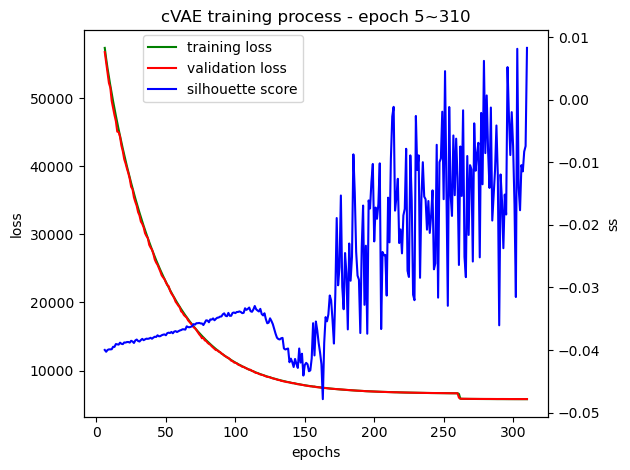

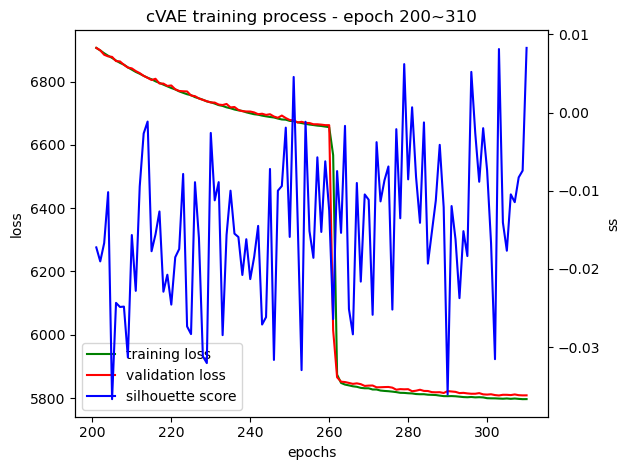

In [7]:
## ---------------------------------------------------------------
left = 5
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center",  bbox_to_anchor=(0.3, 0.9))

plt.title(f'cVAE training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left =200
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
#ax1.legend()

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax2.set_ylabel('ss')
#ax2.legend(loc='upper left')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc=3)

plt.title(f'cVAE training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

## train/val

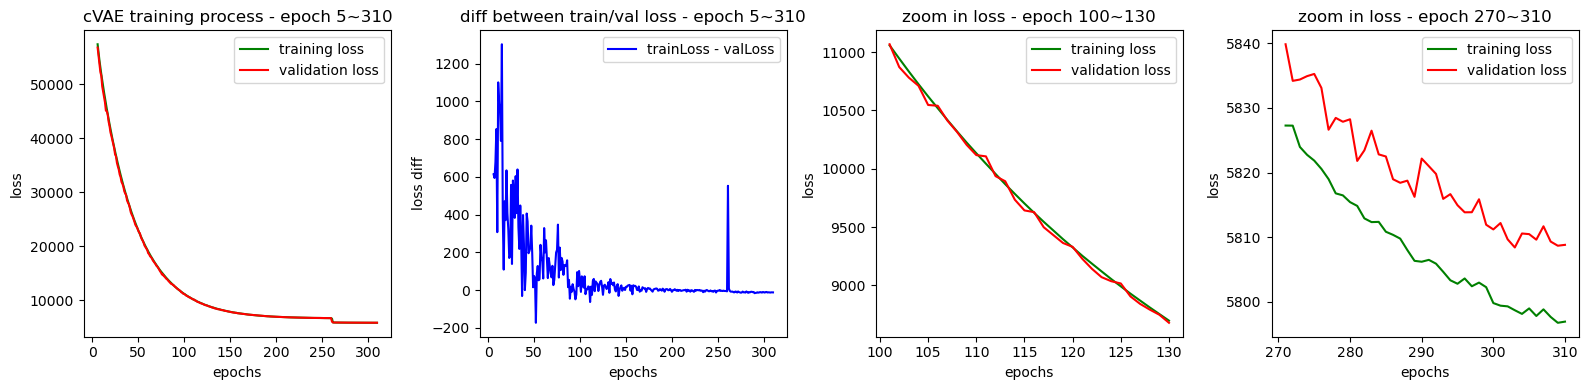

In [8]:
fig, (ax1,ax2,ax3,ax4) = plt.subplots(1,4,figsize=(16,4))
#fig, (ax1) = plt.subplots()

left = 5
right = len(epochs)
ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss')
ax1.set_xlabel('epochs')
ax1.legend()
ax1.set_title(f'cVAE training process - epoch {left}~{right}')

left = 5
right = len(epochs)
ax2.plot(epochs[left:right], np.array(loss_train[left:right]) - np.array(loss_val[left:right]), label='trainLoss - valLoss', color='b')
ax2.set_ylabel('loss diff')
ax2.set_xlabel('epochs')
ax2.legend()
ax2.set_title(f'diff between train/val loss - epoch {left}~{right}')

left = 100
right = 130
ax3.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
ax3.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax3.set_ylabel('loss')
ax3.set_xlabel('epochs')
ax3.legend()
ax3.set_title(f'zoom in loss - epoch {left}~{right}')

left = 270
right = len(epochs)
ax4.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
ax4.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax4.set_ylabel('loss')
ax4.set_xlabel('epochs')
ax4.legend()
ax4.set_title(f'zoom in loss - epoch {left}~{right}')

fig.tight_layout()
plt.savefig("./teams/dif3.png")
plt.show()

## Train loss

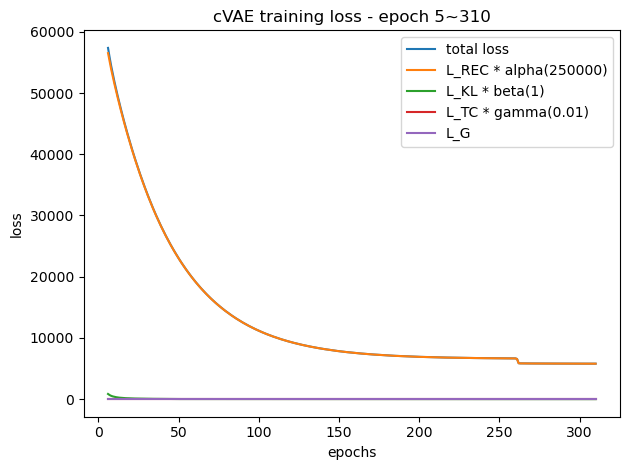

In [9]:
# alpha=1
# beta=1
# gamma=0.01

left = 5
right = len(epochs)

## 'loss'
plt.plot(epochs[left:right], train_history["loss"][left:right] , label='total loss')

## "reconst_loss", alpha=250000
## 'reconst_loss_tg', 'reconst_loss_bg'
# plt.plot(epochs[left:right], np.array(train_history["reconst_loss"])[left:right] / (160 * 192 * 160) , label='reconst_train')
plt.plot(epochs[left:right], alpha * np.array(train_history["reconst_loss"])[left:right]  / (160 * 192 * 160), label=f'L_REC * alpha({alpha})')

## "KL_loss", beta = 1
## 'KL_s_tg', 'KL_z_tg', 'KL_z_bg'
plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label='beta * KL_s_tg')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label='beta * KL_z_tg')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label='beta * KL_z_bg')

## 'TC_loss', gamma=100
# plt.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='TC_train')
plt.plot(epochs[left:right], gamma * np.array(train_history["TC_loss"])[left:right], label=f'L_TC * gamma({gamma})')

## 'discriminator_loss'
plt.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='L_G')

plt.title(f'cVAE training loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()

#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

plt.tight_layout()
plt.show()

## Train REC loss

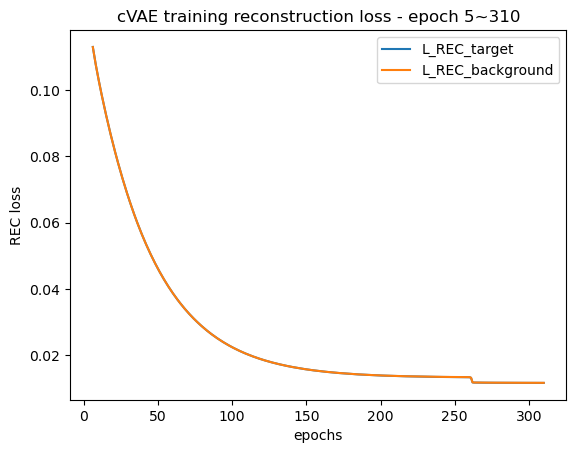

In [10]:
## "reconst_loss", alpha=1
## 'reconst_loss_tg', 'reconst_loss_bg'

## ---------------------------------------------------------------
left = 5
right = len(epochs)

#plt.plot(epochs[left:right], np.array(train_history["reconst_loss"])[left:right]  / (160 * 192 * 160), label=f'L_REC')
plt.plot(epochs[left:right], np.array(train_history["reconst_loss_tg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_target')
plt.plot(epochs[left:right], np.array(train_history["reconst_loss_bg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_background')

plt.title(f'cVAE training reconstruction loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
# left = 175
# right = 200

# #plt.plot(epochs[left:right], np.array(train_history["reconst_loss"])[left:right]  / (160 * 192 * 160), label=f'L_REC')
# plt.plot(epochs[left:right], np.array(train_history["reconst_loss_tg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_target')
# plt.plot(epochs[left:right], np.array(train_history["reconst_loss_bg"])[left:right]  / (160 * 192 * 160), label=f'L_REC_background')

# plt.title(f'cVAE training reconstruction loss - epoch {left}~{right}')
# plt.xlabel("epochs")
# plt.ylabel("REC loss")
# plt.legend()

# fig.tight_layout()
# plt.show()

In [11]:
print(np.array(train_history["reconst_loss_tg"])[0] /  (160 * 192 * 160))
print(np.array(train_history["reconst_loss_tg"])[-1] /  (160 * 192 * 160))
print(np.array(train_history["reconst_loss_tg"])[246] /  (160 * 192 * 160))

0.14165991465250652
0.01157027800877889
0.013345928192138671


## Train KL loss

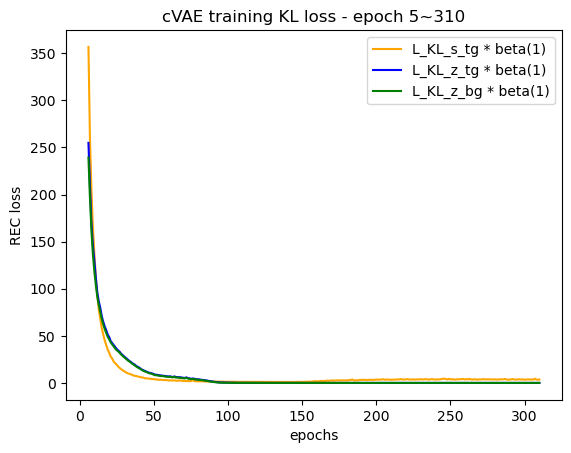

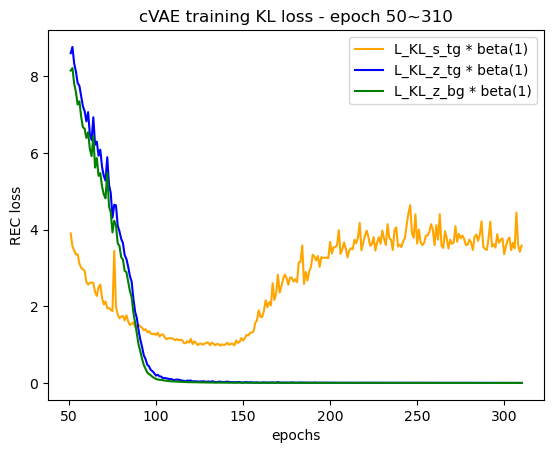

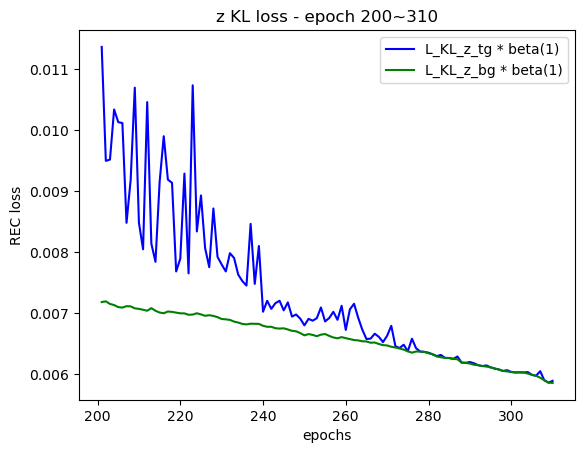

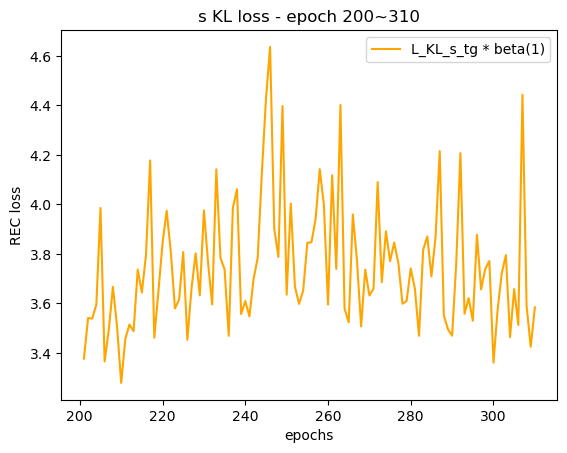

In [12]:
## "KL_loss", beta = 1
## 'KL_s_tg', 'KL_z_tg', 'KL_z_bg'

## ---------------------------------------------------------------
left = 5
right = len(epochs)

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.title(f'cVAE training KL loss - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 50
right = len(epochs)
plt.title(f'cVAE training KL loss - epoch {left}~{right}')

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 200
right = len(epochs)
plt.title(f'z KL loss - epoch {left}~{right}')

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()

## ---------------------------------------------------------------
left = 200
right = len(epochs)
plt.title(f's KL loss - epoch {left}~{right}')

# plt.plot(epochs[left:right], beta * np.array(train_history["KL_loss"])[left:right], label=f'L_KL * beta({beta})')
plt.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f'L_KL_s_tg * beta({beta})', color='orange')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'L_KL_z_tg * beta({beta})', color='blue')
# plt.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'L_KL_z_bg * beta({beta})', color='green')

plt.xlabel("epochs")
plt.ylabel("REC loss")
plt.legend()

fig.tight_layout()
plt.show()



In [13]:
np.array(train_history["KL_s_tg"])[210:].max()

4.63585090637207

In [14]:
((np.array(train_history["KL_z_tg"])+np.array(train_history["KL_z_bg"])) / 2)[210:].min()

0.0058622402139008045

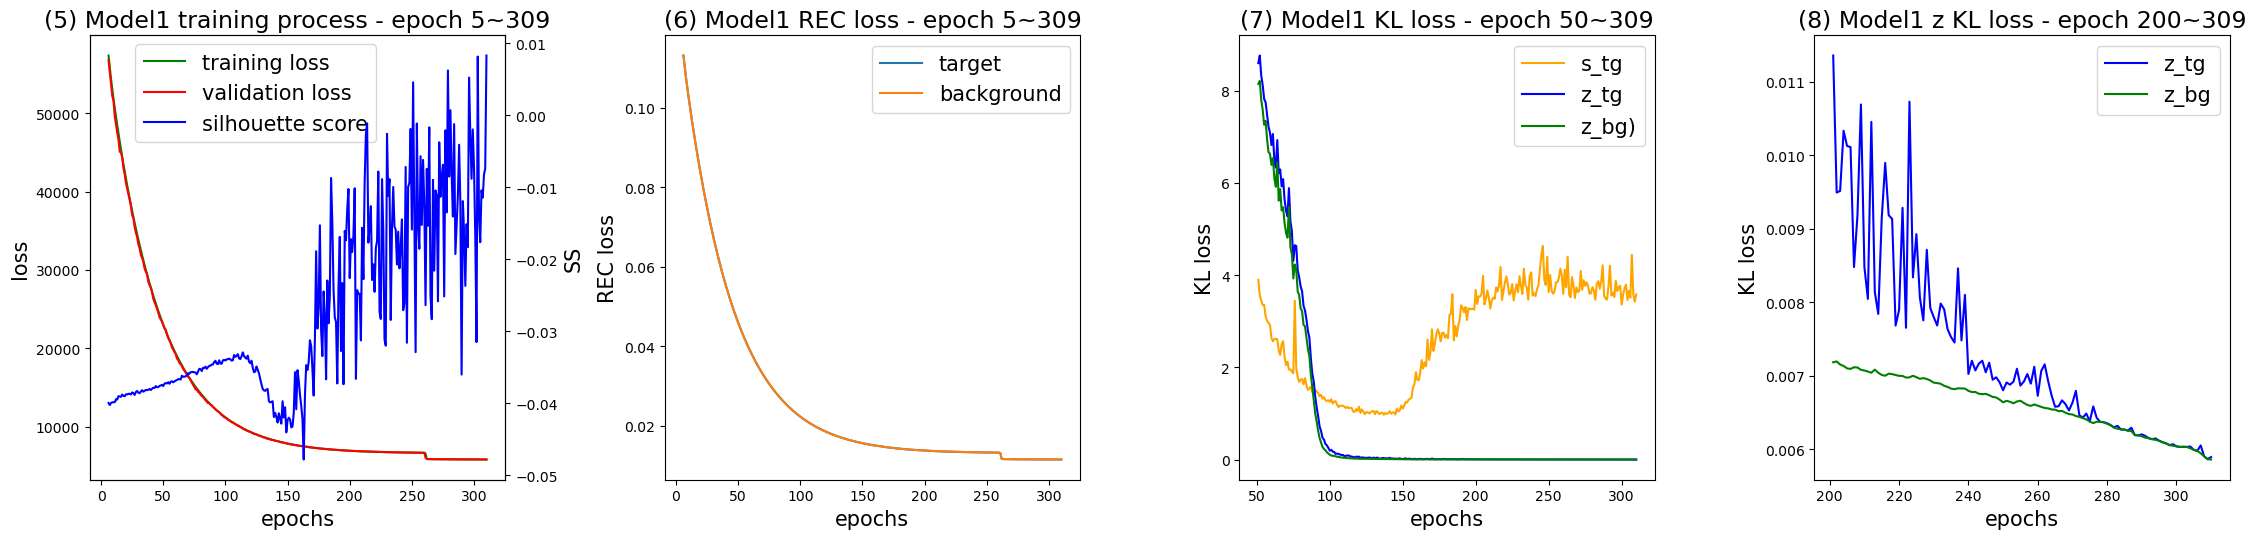

In [15]:
fig, (ax1, ax0, ax2, ax3) = plt.subplots(1,4,figsize=(22.5,5.5))
title_size = 17
label_size = 15
legend_size = 15

left = 5
right = len(epochs)
lns1 = ax1.plot(epochs[left:right], loss_train[left:right], label='training loss', color='g')
lns2 = ax1.plot(epochs[left:right], loss_val[left:right], label='validation loss', color='r')
ax1.set_ylabel('loss', fontsize=label_size)
ax1.set_xlabel('epochs', fontsize=label_size)
ax = ax1.twinx()
lns3 = ax.plot(epochs[left:right], ss_plot[left:right], label='silhouette score', color='b')
ax.set_ylabel('SS', fontsize=label_size)
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs, loc="center",  bbox_to_anchor=(0.4, 0.87), fontsize=legend_size)
ax1.set_title(f'(5) Model1 training process - epoch {left}~{right-1}', fontsize=title_size)

left = 5
right = len(epochs)
ax0.plot(epochs[left:right], np.array(train_history["reconst_loss_tg"])[left:right]  / (160 * 192 * 160), label=f'target')
ax0.plot(epochs[left:right], np.array(train_history["reconst_loss_bg"])[left:right]  / (160 * 192 * 160), label=f'background')
ax0.set_title(f'(6) Model1 REC loss - epoch {left}~{right-1}', fontsize=title_size)
ax0.set_xlabel("epochs", fontsize=label_size)
ax0.set_ylabel("REC loss", fontsize=label_size)
ax0.legend(fontsize=legend_size)


left = 50
right = len(epochs)
ax2.set_title(f'(7) Model1 KL loss - epoch {left}~{right-1}', fontsize=title_size)
ax2.plot(epochs[left:right], beta * np.array(train_history["KL_s_tg"])[left:right], label=f's_tg', color='orange')
ax2.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'z_tg', color='blue')
ax2.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'z_bg)', color='green')
ax2.set_xlabel("epochs", fontsize=label_size)
ax2.set_ylabel("KL loss", fontsize=label_size)
ax2.legend(fontsize=legend_size)

left = 200
right = len(epochs)
ax3.set_title(f'(8) Model1 z KL loss - epoch {left}~{right-1}', fontsize=title_size)
ax3.plot(epochs[left:right], beta * np.array(train_history["KL_z_tg"])[left:right], label=f'z_tg', color='blue')
ax3.plot(epochs[left:right], beta * np.array(train_history["KL_z_bg"])[left:right], label=f'z_bg', color='green')
ax3.set_xlabel("epochs", fontsize=label_size)
ax3.set_ylabel("KL loss", fontsize=label_size)
ax3.legend(fontsize=legend_size)

fig.tight_layout()
plt.savefig("./analysis/model1-loss")
plt.show()

In [16]:
print(np.array(train_history["KL_s_tg"])[150:200])

[1.17163742 1.25569201 1.24094367 1.30369365 1.32013369 1.34630764
 1.56544852 1.64010513 1.89735603 1.7307266  1.72230327 1.89096677
 2.15936065 1.97859037 2.11036491 2.02743506 2.60447598 2.16557646
 2.331038   2.82707453 2.36029053 2.51028967 2.71323466 2.82750583
 2.73718119 2.56458807 2.74943018 2.75133562 2.64487267 2.70726442
 2.6340735  3.14077902 3.16285205 3.58785605 2.58662868 2.89776182
 2.67595863 2.90961266 3.02765846 3.34729743 3.29336739 3.19790363
 3.31145    3.0279541  3.28558016 3.26289725 3.26657748 3.27014351
 3.25442123 3.6812675 ]


## Train TC + G loss

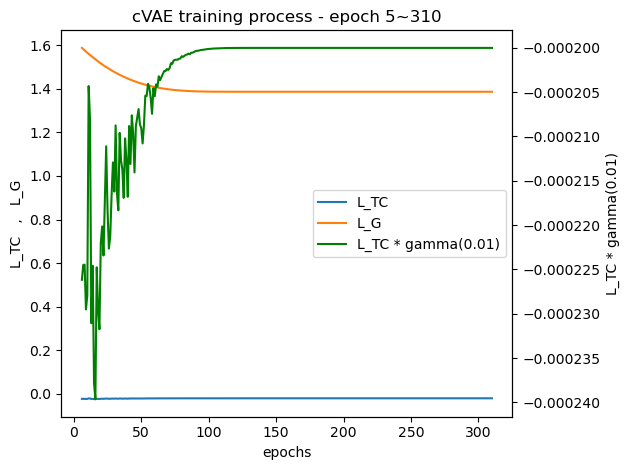

In [17]:
## 'TC_loss', gamma=1
## 'discriminator_loss'

## ---------------------------------------------------------------
left = 5
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='L_TC')
lns2 = ax1.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='L_G')
ax1.set_xlabel('epochs')
ax1.set_ylabel(f'L_TC   ,   L_G')

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], gamma * np.array(train_history["TC_loss"])[left:right], label=f'L_TC * gamma({gamma})', color='g')
ax2.set_ylabel(f'L_TC * gamma({gamma})')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

plt.title(f'cVAE training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.show()

In [18]:
print(train_history["discriminator_loss"][0])
print(train_history["TC_loss"][0])

1.6178205013275146
-0.005536890588700771


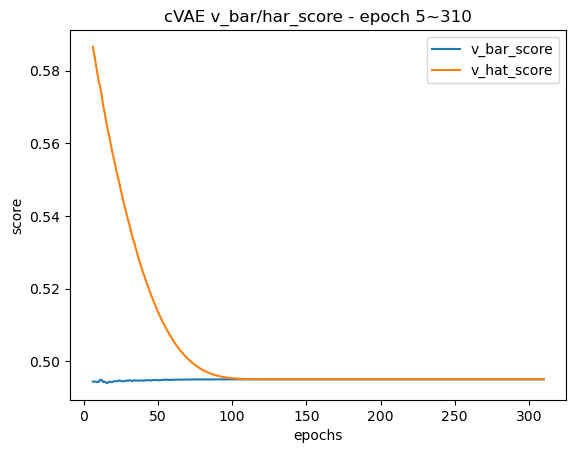

In [19]:
v_bar_score = np.exp(np.array(train_history["TC_loss"])) / (1 + np.exp(np.array(train_history["TC_loss"])))
v_hat_score = 1 - ( np.exp(-1 * np.array(train_history["discriminator_loss"])) / v_bar_score ) 

## ---------------------------------------------------------------
left = 5
right = len(epochs)

plt.plot(epochs[left:right], v_bar_score[left:right], label=f'v_bar_score')
plt.plot(epochs[left:right], v_hat_score[left:right], label=f'v_hat_score')

plt.title(f'cVAE v_bar/har_score - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("score")
plt.legend()

fig.tight_layout()
plt.show()

**cVAE just force v_har_sc

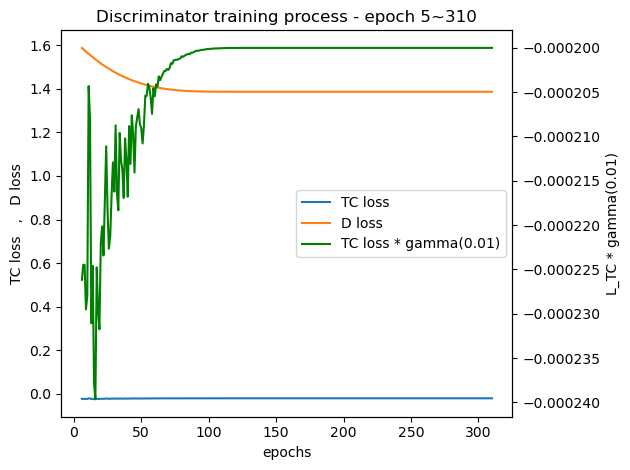

In [20]:
## 'TC_loss', gamma=1
## 'discriminator_loss'

## ---------------------------------------------------------------
left = 5
right = len(epochs)

fig, ax1 = plt.subplots()
lns1 = ax1.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='TC loss')
lns2 = ax1.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='D loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel(f'TC loss   ,   D loss')

ax2 = ax1.twinx()
lns3 = ax2.plot(epochs[left:right], gamma * np.array(train_history["TC_loss"])[left:right], label=f'TC loss * gamma({gamma})', color='g')
ax2.set_ylabel(f'L_TC * gamma({gamma})')

# add legend
lns = lns1+lns2+lns3
labs = [l.get_label() for l in lns]
ax1.legend(lns, labs)

plt.title(f'Discriminator training process - epoch {left}~{right}')
#plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))

fig.tight_layout()
plt.savefig("./teams/disc.png")
plt.show()

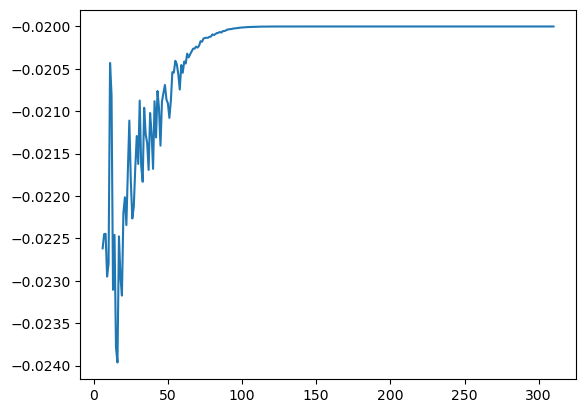

In [21]:
plt.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='TC loss')

In [22]:
np.array(train_history["TC_loss"])[200:250]

array([-0.02000058, -0.02000058, -0.02000058, -0.02000058, -0.02000058,
       -0.02000058, -0.02000058, -0.02000058, -0.02000058, -0.02000058,
       -0.02000058, -0.02000058, -0.02000058, -0.0200006 , -0.02000061,
       -0.02000058, -0.02000058, -0.02000058, -0.02000058, -0.02000059,
       -0.02000058, -0.02000058, -0.02000058, -0.02000058, -0.02000058,
       -0.02000058, -0.02000058, -0.02000058, -0.02000058, -0.02000058,
       -0.02000058, -0.02000058, -0.02000058, -0.02000058, -0.02000059,
       -0.02000058, -0.02000058, -0.02000058, -0.02000058, -0.02000058,
       -0.02000058, -0.02000058, -0.02000058, -0.02000058, -0.02000058,
       -0.02000058, -0.02000058, -0.02000058, -0.02000059, -0.02000058])

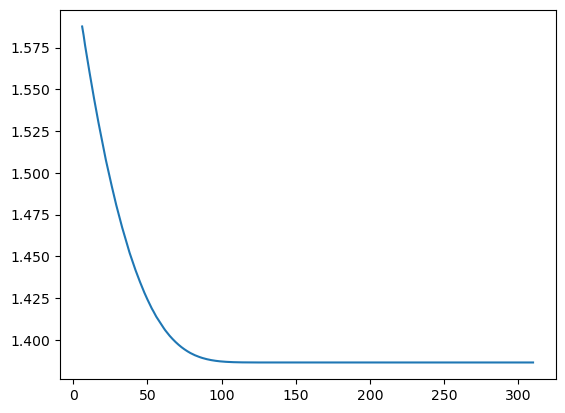

In [23]:
plt.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='Discriminator loss')

In [24]:
np.array(train_history["discriminator_loss"])[200:250]

array([1.38639438, 1.38639438, 1.38639438, 1.38639438, 1.38639438,
       1.38639438, 1.38639438, 1.38639438, 1.38639438, 1.38639438,
       1.38639438, 1.38639438, 1.38639438, 1.38639438, 1.38639438,
       1.38639438, 1.38639438, 1.38639438, 1.38639438, 1.38639438,
       1.38639438, 1.38639438, 1.38639438, 1.38639438, 1.38639438,
       1.38639438, 1.38639438, 1.38639438, 1.38639438, 1.38639438,
       1.38639438, 1.38639438, 1.38639438, 1.38639438, 1.38639438,
       1.38639438, 1.38639438, 1.38639438, 1.38639438, 1.38639438,
       1.38639438, 1.38639438, 1.38639438, 1.38639438, 1.38639438,
       1.38639438, 1.38639438, 1.38639438, 1.38639438, 1.38639438])

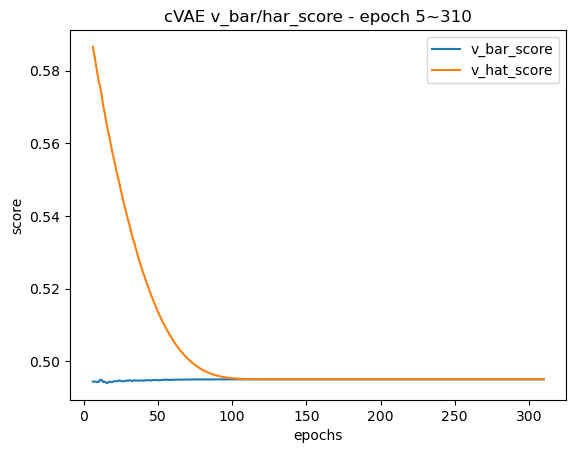

In [25]:

v_bar_score = np.exp(np.array(train_history["TC_loss"])) / (1 + np.exp(np.array(train_history["TC_loss"])))
v_hat_score = 1 - ( np.exp(-1 * np.array(train_history["discriminator_loss"])) / v_bar_score ) 

## ---------------------------------------------------------------
left = 5
right = len(epochs)

plt.plot(epochs[left:right], v_bar_score[left:right], label=f'v_bar_score')
plt.plot(epochs[left:right], v_hat_score[left:right], label=f'v_hat_score')

plt.title(f'cVAE v_bar/har_score - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("score")
plt.legend()

fig.tight_layout()
plt.show()

In [26]:
v_bar_score[200:250]

array([0.49500002, 0.49500002, 0.49500002, 0.49500002, 0.49500002,
       0.49500002, 0.49500002, 0.49500002, 0.49500002, 0.49500002,
       0.49500002, 0.49500002, 0.49500002, 0.49500002, 0.49500001,
       0.49500002, 0.49500002, 0.49500002, 0.49500002, 0.49500002,
       0.49500002, 0.49500002, 0.49500002, 0.49500002, 0.49500002,
       0.49500002, 0.49500002, 0.49500002, 0.49500002, 0.49500002,
       0.49500002, 0.49500002, 0.49500002, 0.49500002, 0.49500002,
       0.49500002, 0.49500002, 0.49500002, 0.49500002, 0.49500002,
       0.49500002, 0.49500002, 0.49500002, 0.49500002, 0.49500002,
       0.49500002, 0.49500002, 0.49500002, 0.49500002, 0.49500002])

In [27]:
v_hat_score[200:250]

array([0.49500003, 0.49500003, 0.49500003, 0.49500003, 0.49500003,
       0.49500003, 0.49500003, 0.49500003, 0.49500003, 0.49500003,
       0.49500003, 0.49500003, 0.49500003, 0.49500002, 0.49500002,
       0.49500003, 0.49500003, 0.49500003, 0.49500003, 0.49500003,
       0.49500003, 0.49500003, 0.49500003, 0.49500003, 0.49500003,
       0.49500003, 0.49500003, 0.49500003, 0.49500003, 0.49500003,
       0.49500003, 0.49500003, 0.49500003, 0.49500003, 0.49500003,
       0.49500003, 0.49500003, 0.49500003, 0.49500003, 0.49500003,
       0.49500003, 0.49500003, 0.49500003, 0.49500003, 0.49500003,
       0.49500003, 0.49500003, 0.49500003, 0.49500003, 0.49500003])

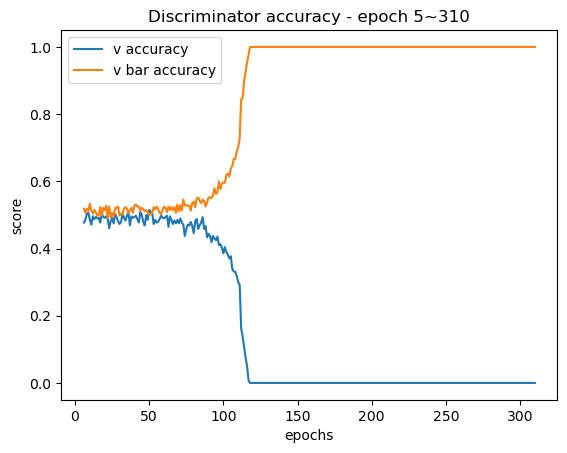

In [28]:
v_bar_score = np.exp(np.array(train_history["TC_loss"])) / (1 + np.exp(np.array(train_history["TC_loss"])))
v_hat_score = 1 - ( np.exp(-1 * np.array(train_history["discriminator_loss"])) / v_bar_score ) 

## ---------------------------------------------------------------
left = 5
right = len(epochs)

plt.plot(epochs[left:right], train_history["v_acc"][left:right], label=f'v accuracy')
plt.plot(epochs[left:right], train_history["v_bar_acc"][left:right], label=f'v bar accuracy')

plt.title(f'Discriminator accuracy - epoch {left}~{right}')
plt.xlabel("epochs")
plt.ylabel("score")
plt.legend()

fig.tight_layout()
plt.show()

In [29]:
print(train_history["v_acc"][200:250])
print(train_history["v_bar_acc"][200:250])

[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


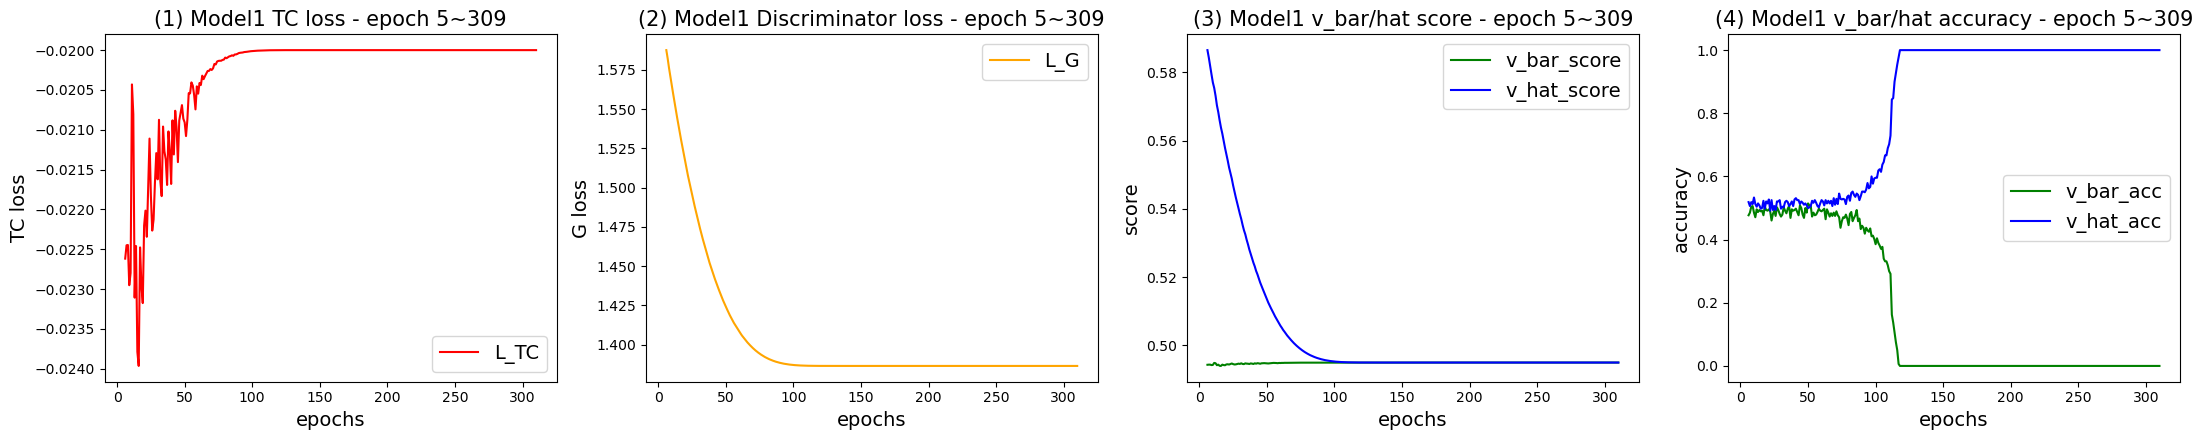

In [30]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,figsize=(22, 4.5))
title_size = 15
label_size = 14
legend_size = 14

## tc loss
left = 5
right = len(epochs)
ax1.plot(epochs[left:right], np.array(train_history["TC_loss"])[left:right], label='L_TC', color='red')
ax1.set_xlabel('epochs', fontsize=label_size)
ax1.set_ylabel(f'TC loss', fontsize=label_size)
ax1.legend(fontsize=legend_size)
ax1.set_title(f'(1) Model1 TC loss - epoch {left}~{right-1}', fontsize=title_size)

## G loss
left = 5
right = len(epochs)
ax2.plot(epochs[left:right], np.array(train_history["discriminator_loss"])[left:right], label='L_G', color='orange')
ax2.set_xlabel('epochs', fontsize=label_size)
ax2.set_ylabel(f'G loss', fontsize=label_size)
ax2.legend(fontsize=legend_size)
ax2.set_title(f'(2) Model1 Discriminator loss - epoch {left}~{right-1}', fontsize=title_size)

## v / v_bar score
left = 5
right = len(epochs)
ax3.plot(epochs[left:right], v_bar_score[left:right], label=f'v_bar_score', color='green')
ax3.plot(epochs[left:right], v_hat_score[left:right], label=f'v_hat_score', color='blue')
ax3.set_title(f'(3) Model1 v_bar/hat score - epoch {left}~{right-1}', fontsize=title_size)
ax3.set_xlabel("epochs", fontsize=label_size)
ax3.set_ylabel("score", fontsize=label_size)
ax3.legend(fontsize=legend_size)

## acc
left = 5
right = len(epochs)
ax4.plot(epochs[left:right], train_history["v_acc"][left:right], label=f'v_bar_acc', color='green')
ax4.plot(epochs[left:right], train_history["v_bar_acc"][left:right], label=f'v_hat_acc', color='blue')
ax4.set_title(f'(4) Model1 v_bar/hat accuracy - epoch {left}~{right-1}', fontsize=title_size)
ax4.set_xlabel("epochs", fontsize=label_size)
ax4.set_ylabel("accuracy", fontsize=label_size)
ax4.legend(fontsize=legend_size)

##
fig.tight_layout()
plt.savefig("./analysis/Model1-G.png")
plt.show()